In [1]:
import pandas as pd

# Load your CSV file
csv_file_path = '/Users/tobiasnikolaisen/Documents/Github/HEL8048/bigfive_patterns/data/raw_data.csv'  # Update this with your actual file path
df_csv = pd.read_csv(csv_file_path)

# Load the JSON file
json_file_path = '/Users/tobiasnikolaisen/Documents/Github/HEL8048/bigfive_patterns/data/output.json'
df_json = pd.read_json(json_file_path)

# Merge them on 'id'
df_merged = df_csv.merge(df_json, on='id', how='left')

# Show the first few rows to verify
df_merged.head()

ValueError: Expected object or value

In [7]:
df_merged.to_csv("merged_output.csv", index=False)

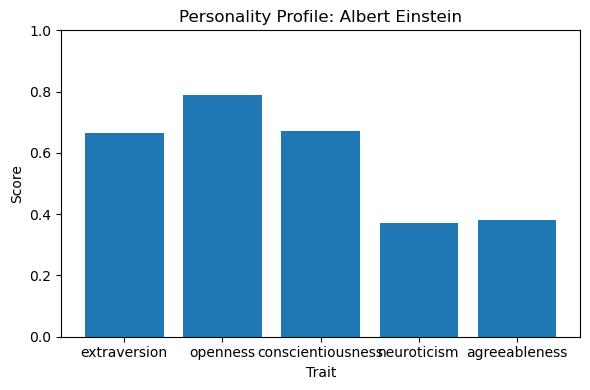

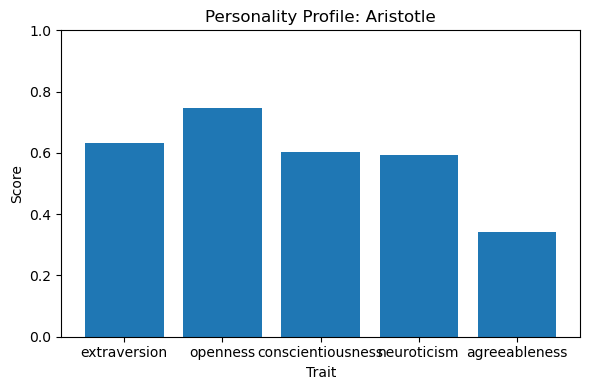

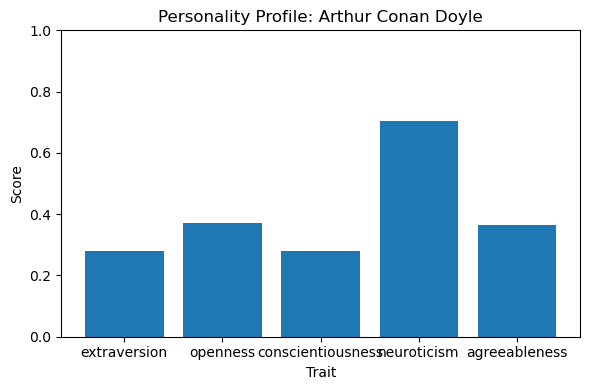

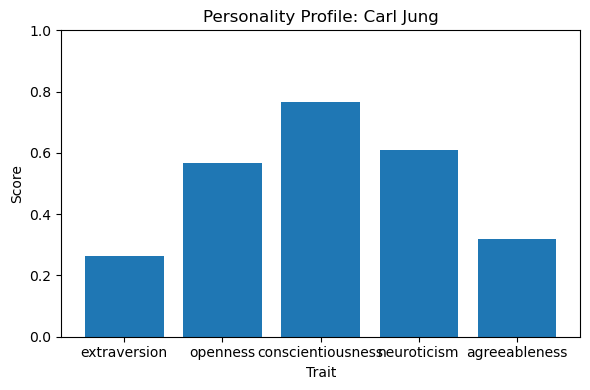

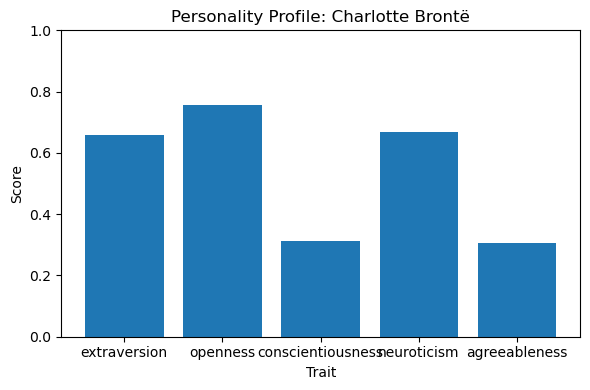

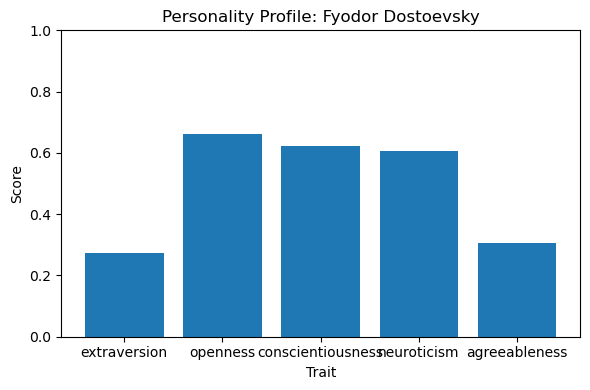

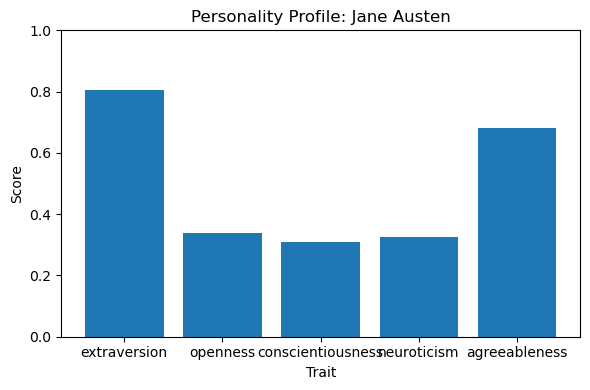

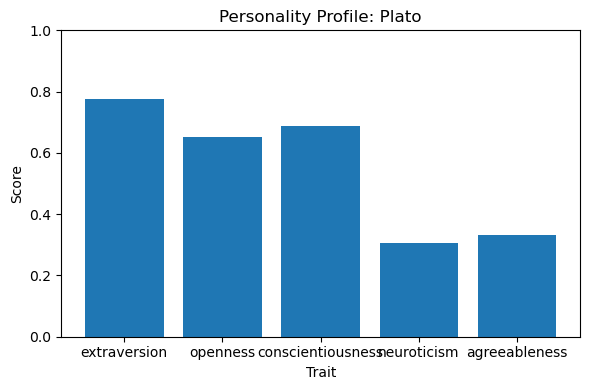

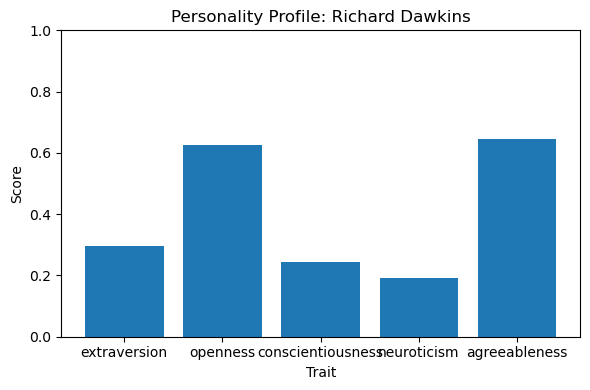

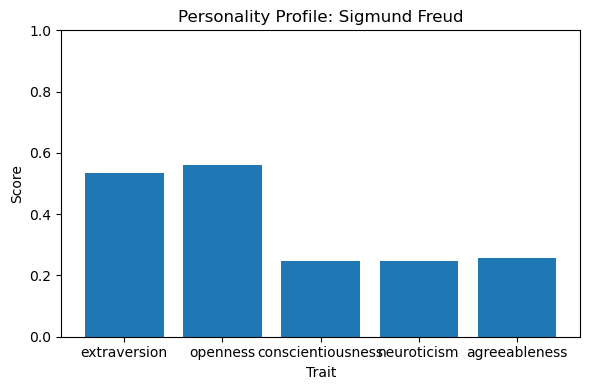

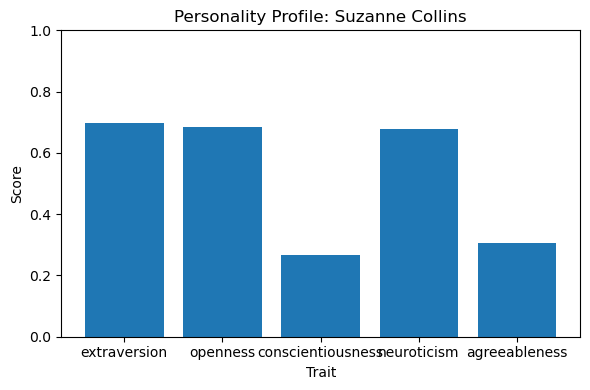

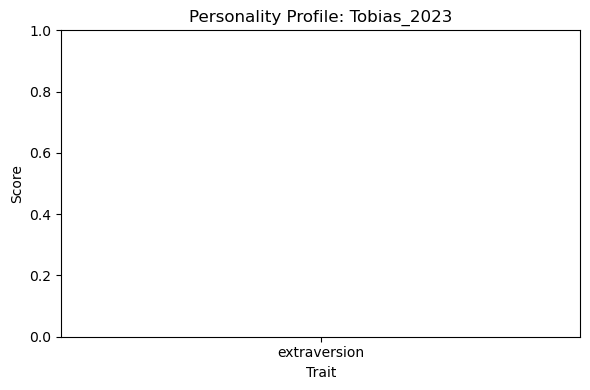

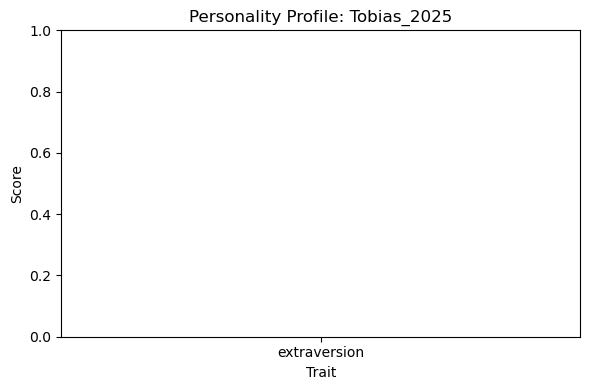

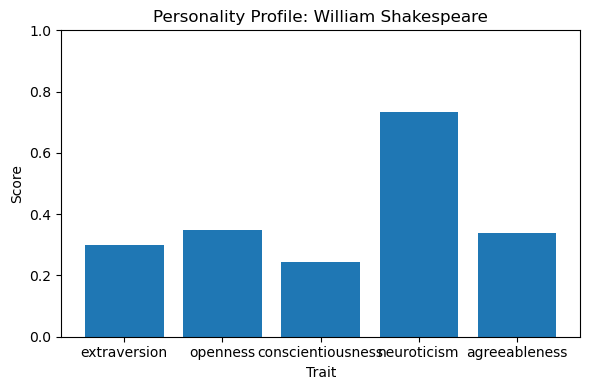

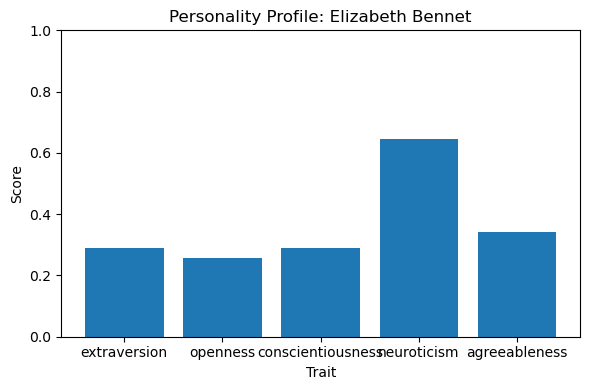

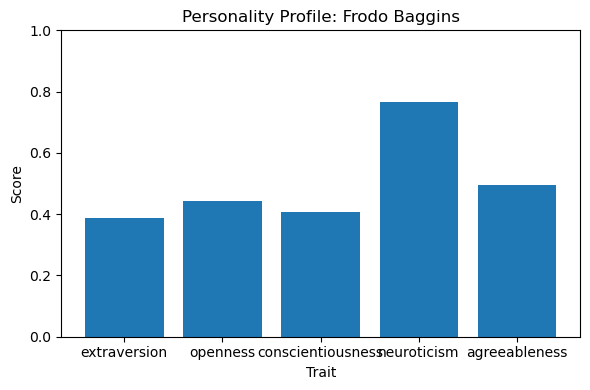

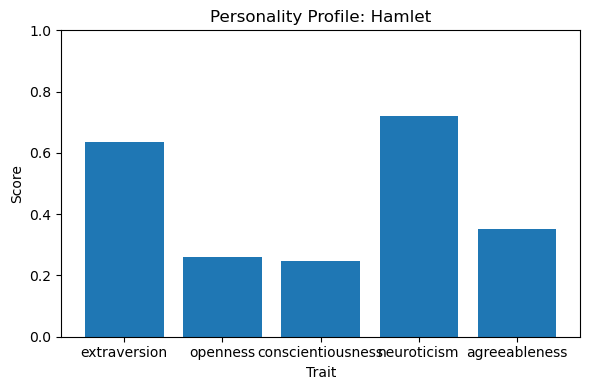

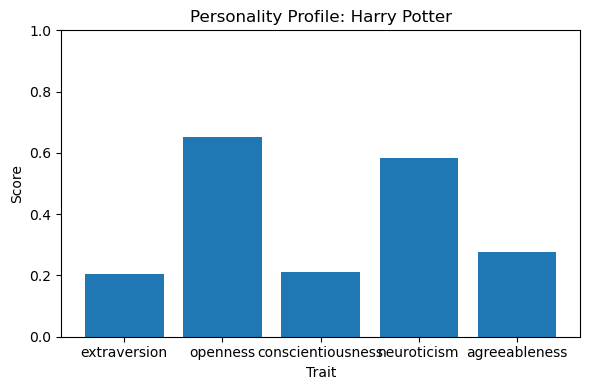

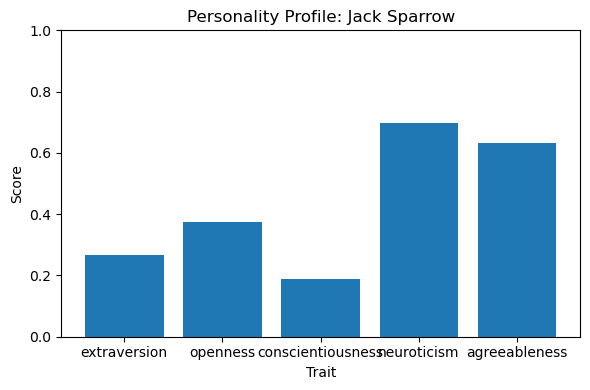

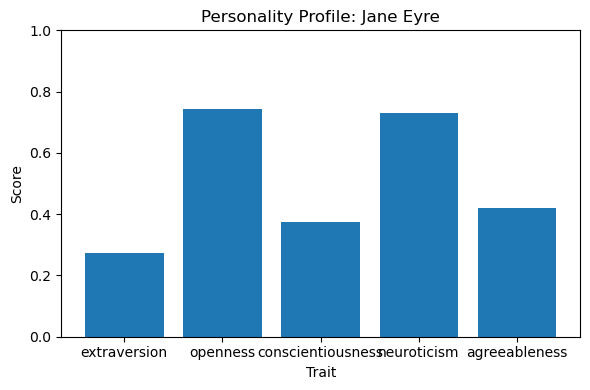

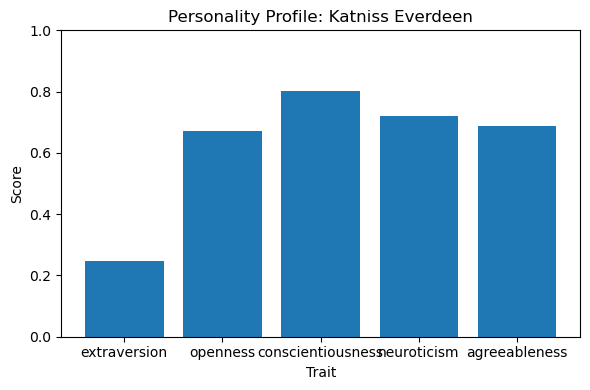

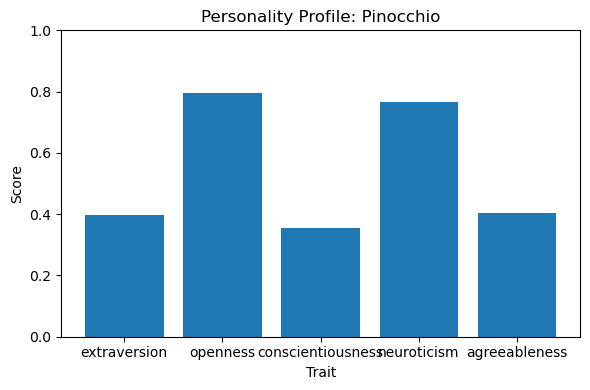

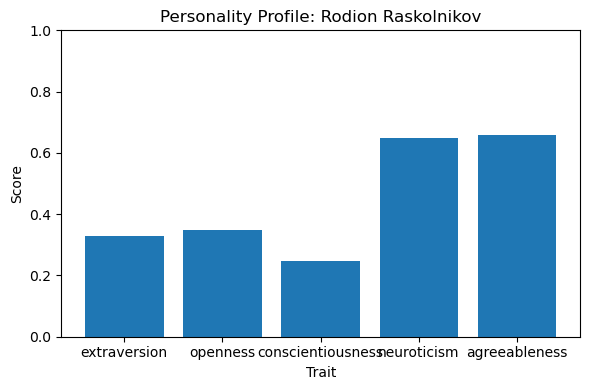

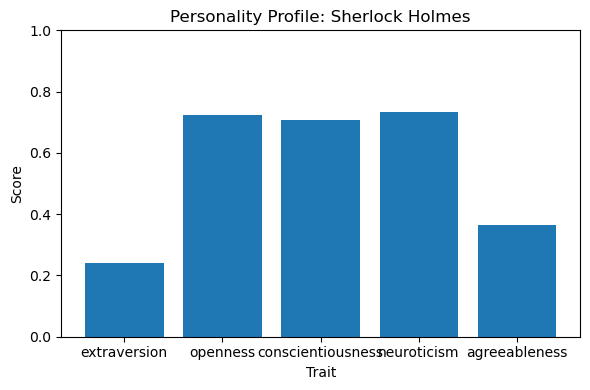

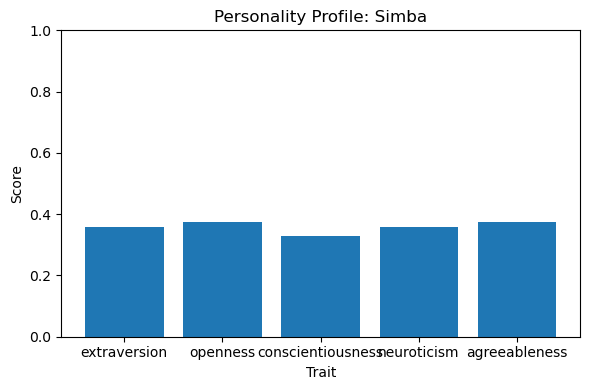

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("merged_output.csv")

# Traits to plot
traits = ["extraversion", "openness", "conscientiousness", "neuroticism", "agreeableness"]

# Loop through each individual
for idx, row in df.iterrows():
    name = row["name"] if "name" in row and pd.notnull(row["name"]) else f"ID {row['id']}"
    
    # Get trait values
    values = row[traits].values
    
    # Create bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(traits, values)
    plt.ylim(0, 1)
    plt.title(f"Personality Profile: {name}")
    plt.ylabel("Score")
    plt.xlabel("Trait")
    plt.tight_layout()
    plt.show()


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("merged_output.csv")

# === STEP 1: Define traits and their actual facets from your dataset ===

traits = {
    "extraversion": [
        "active", "assertive", "cheerful",
        "excitement_seeking", "outgoing", "gregariousness"
    ],
    "openness": [
        "adventurous", "artistic", "emotionally_aware",
        "imaginative", "intellectual", "authority_challenging"
    ],
    "conscientiousness": [
        "cautious", "disciplined", "dutiful",
        "achievement_striving", "orderliness", "self_efficacy"
    ],
    "neuroticism": [
        "melancholy", "self_conscious", "stress_prone",
        "fiery", "prone_to_worry", "immoderation"
    ],
    "agreeableness": [
        "cooperative", "trusting", "altruism",
        "modesty", "uncompromising", "sympathy"
    ]
}


Correlation matrix for main Big Five traits:
                   extraversion  openness  conscientiousness  neuroticism  \
extraversion           1.000000  0.116120           0.019460    -0.385491   
openness               0.116120  1.000000           0.502079    -0.041922   
conscientiousness      0.019460  0.502079           1.000000     0.001293   
neuroticism           -0.385491 -0.041922           0.001293     1.000000   
agreeableness         -0.122313 -0.248723          -0.069346    -0.068391   

                   agreeableness  
extraversion           -0.122313  
openness               -0.248723  
conscientiousness      -0.069346  
neuroticism            -0.068391  
agreeableness           1.000000  


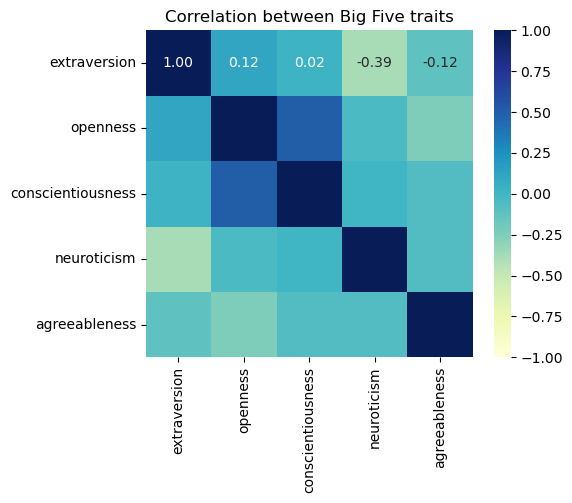

In [6]:
# === STEP 2: Correlation matrix of the main traits ===

main_traits = list(traits.keys())
main_trait_corr = df[main_traits].corr()

print("Correlation matrix for main Big Five traits:")
print(main_trait_corr)

plt.figure(figsize=(6, 5))
sns.heatmap(main_trait_corr, annot=True, fmt=".2f", cmap="YlGnBu", square=True, cbar=True,
            vmin=-1, vmax=1)
plt.title("Correlation between Big Five traits")
plt.tight_layout()
plt.show()


Correlation matrix for Extraversion facets:
                      active  assertive  cheerful  excitement_seeking  \
active              1.000000   0.381442 -0.065515            0.166214   
assertive           0.381442   1.000000  0.091389            0.356183   
cheerful           -0.065515   0.091389  1.000000            0.497082   
excitement_seeking  0.166214   0.356183  0.497082            1.000000   
outgoing            0.355695   0.312443  0.045033            0.280846   
gregariousness      0.464869   0.061538 -0.177504            0.096022   

                    outgoing  gregariousness  
active              0.355695        0.464869  
assertive           0.312443        0.061538  
cheerful            0.045033       -0.177504  
excitement_seeking  0.280846        0.096022  
outgoing            1.000000       -0.033649  
gregariousness     -0.033649        1.000000  


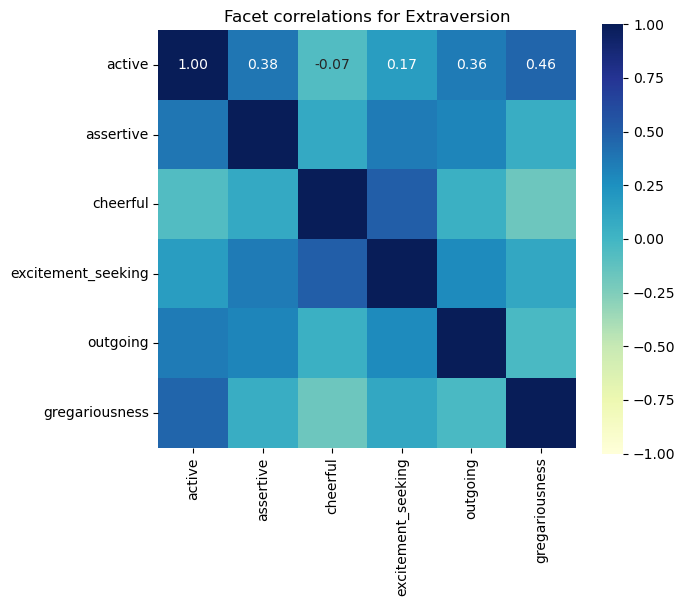


Correlation matrix for Openness facets:
                       adventurous  artistic  emotionally_aware  imaginative  \
adventurous               1.000000  0.352573           0.257836     0.146277   
artistic                  0.352573  1.000000          -0.067601     0.608707   
emotionally_aware         0.257836 -0.067601           1.000000    -0.086916   
imaginative               0.146277  0.608707          -0.086916     1.000000   
intellectual              0.267563  0.591549           0.245081     0.557053   
authority_challenging    -0.103592  0.391265          -0.050117     0.403467   

                       intellectual  authority_challenging  
adventurous                0.267563              -0.103592  
artistic                   0.591549               0.391265  
emotionally_aware          0.245081              -0.050117  
imaginative                0.557053               0.403467  
intellectual               1.000000               0.330573  
authority_challenging      0.330

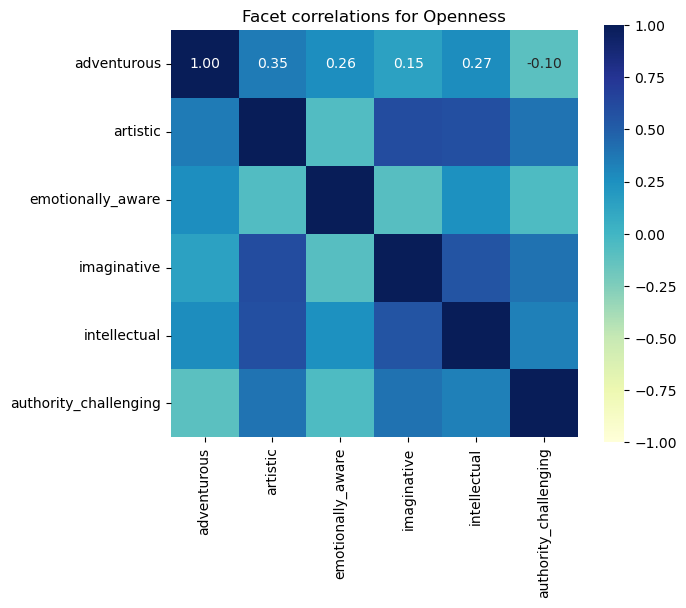


Correlation matrix for Conscientiousness facets:
                      cautious  disciplined   dutiful  achievement_striving  \
cautious              1.000000    -0.484984  0.317072             -0.180119   
disciplined          -0.484984     1.000000 -0.090870              0.181685   
dutiful               0.317072    -0.090870  1.000000              0.456171   
achievement_striving -0.180119     0.181685  0.456171              1.000000   
orderliness          -0.008283     0.120392  0.419091              0.382740   
self_efficacy        -0.042373     0.533202  0.458426              0.623508   

                      orderliness  self_efficacy  
cautious                -0.008283      -0.042373  
disciplined              0.120392       0.533202  
dutiful                  0.419091       0.458426  
achievement_striving     0.382740       0.623508  
orderliness              1.000000       0.456618  
self_efficacy            0.456618       1.000000  


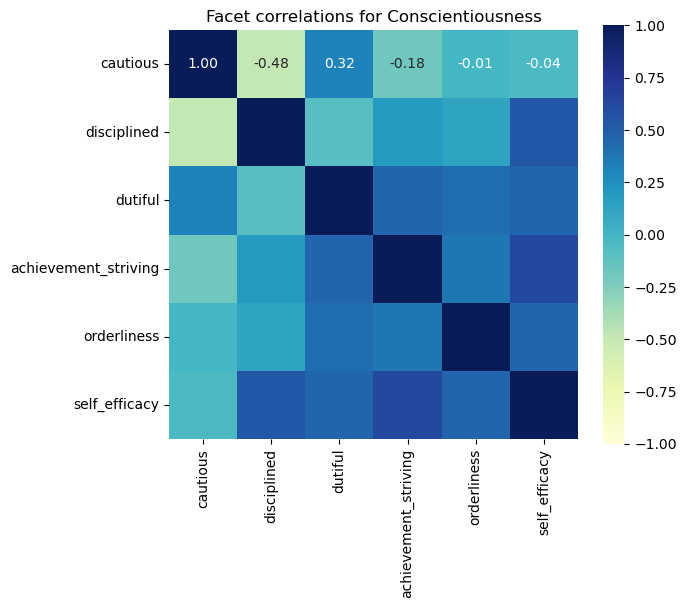


Correlation matrix for Neuroticism facets:
                melancholy  self_conscious  stress_prone     fiery  \
melancholy        1.000000        0.446570      0.222217  0.405658   
self_conscious    0.446570        1.000000      0.599941 -0.008893   
stress_prone      0.222217        0.599941      1.000000  0.044723   
fiery             0.405658       -0.008893      0.044723  1.000000   
prone_to_worry    0.367063        0.289778      0.207114  0.562829   
immoderation     -0.080492       -0.145237     -0.128039 -0.166334   

                prone_to_worry  immoderation  
melancholy            0.367063     -0.080492  
self_conscious        0.289778     -0.145237  
stress_prone          0.207114     -0.128039  
fiery                 0.562829     -0.166334  
prone_to_worry        1.000000     -0.109373  
immoderation         -0.109373      1.000000  


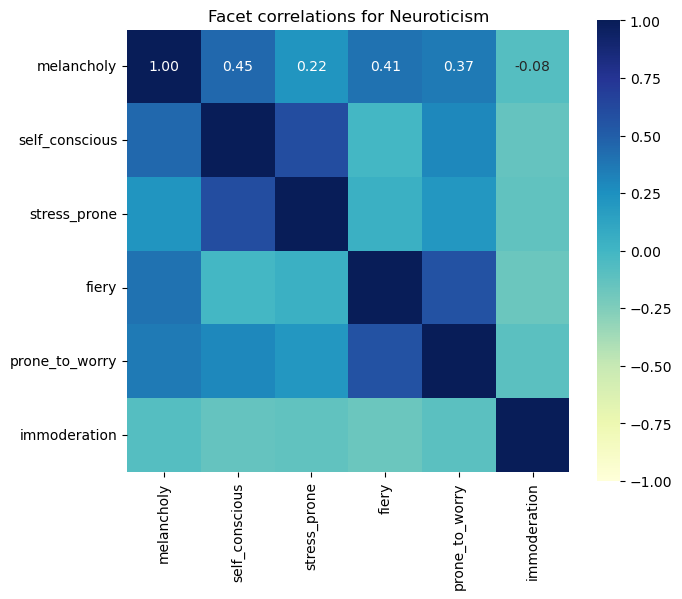


Correlation matrix for Agreeableness facets:
                cooperative  trusting  altruism   modesty  uncompromising  \
cooperative        1.000000  0.165886  0.140525  0.279450        0.137949   
trusting           0.165886  1.000000  0.099387 -0.116478       -0.198005   
altruism           0.140525  0.099387  1.000000  0.269888        0.225982   
modesty            0.279450 -0.116478  0.269888  1.000000       -0.111075   
uncompromising     0.137949 -0.198005  0.225982 -0.111075        1.000000   
sympathy           0.083802 -0.170379  0.106380  0.331006       -0.163303   

                sympathy  
cooperative     0.083802  
trusting       -0.170379  
altruism        0.106380  
modesty         0.331006  
uncompromising -0.163303  
sympathy        1.000000  


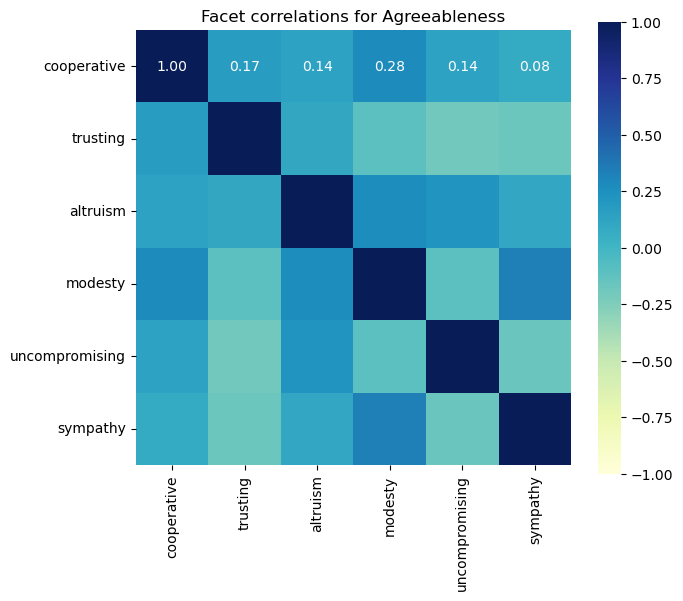

In [7]:
# === STEP 3: Correlation matrix within each trait's facets ===

for trait, facets in traits.items():
    facets_present = [f for f in facets if f in df.columns]
    if len(facets_present) <= 1:
        continue

    facet_data = df[facets_present]

    # Compute correlation matrix; NaNs occur for constant columns
    corr = facet_data.corr(numeric_only=True, method="pearson", min_periods=1)
    corr_display = corr.fillna(0)

    print(f"\nCorrelation matrix for {trait.title()} facets:")
    print(corr)

    plt.figure(figsize=(7, 6))
    sns.heatmap(corr_display, annot=True, fmt=".2f", cmap="YlGnBu", square=True, cbar=True,
                vmin=-1, vmax=1)
    plt.title(f"Facet correlations for {trait.title()}")
    plt.tight_layout()
    plt.show()